# Import Libraries

In [1]:
#import basic modules
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt    
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
%matplotlib inline
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

import lightgbm as lgb
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import classification_report 

#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,SelectKBest,RFE,RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#from lightgbm import LGBMClassifier

#import classification evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score

### Load Data

In [2]:
def load_data():
    df = pd.read_csv("audit_risk.csv")
    return df
#load_data().tail(5)

In [3]:
#dealing with missing values in column "Default", which is also the label data
df=load_data()

#df.isnull().sum()  --- No null data

### EDA 

In [14]:
#first performing basic analysis
def basicanalysis(df):
    print("Shape is:\n", df.shape, ":\n")
    print("Columns are:\n", df.columns, ":\n")
    print("Types are:\n", df.info(), ":\n")
    print("Skewness of columns:\n", df.skew(), ":\n")
   # print("Statistical Analysis of Numerical Columns:\n", df.describe(), ":\n")
basicanalysis(df)

Shape is:
 (776, 26) :

Columns are:
 Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object') :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   PARA_A          776 non-null    float64
 2   Score_A         776 non-null    float64
 3   Risk_A          776 non-null    float64
 4   PARA_B          776 non-null    float64
 5   Score_B         776 non-null    float64
 6   Risk_B          776 non-null    float64
 7   TOTAL           776 non-null    float64
 8   numbers         776 non-null    float

### Changing Type to float

In [5]:
df['History'] = df['History'].astype(float)

In [15]:
df['Risk'] = df['Risk'].astype(float)

In [6]:
df['District_Loss'] = df['District_Loss'].astype(float)

In [11]:
df = df.drop('LOCATION_ID',axis=1)

### Checking for infinite or missing values

In [9]:
df[df==np.inf]=np.nan
df.fillna(df.mean(), inplace=True)

In [12]:
np.isinf(df).values.sum()

0

In [13]:
df.shape

(776, 26)

In [93]:
df.sample(5)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
646,55.57,0.28,0.2,0.056,0.25,0.2,0.050,0.53,5.0,0.2,...,0.4,0.0,0.2,0.0,2.0,1.506,0.4,0.5,0.3012,0.0
459,1.85,7.07,0.6,4.242,0.72,0.2,0.144,7.79,5.0,0.2,...,0.4,0.0,0.2,0.0,2.4,5.786,0.4,0.5,1.1572,1.0
575,59.85,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,...,0.4,0.0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0.0
137,3.41,4.13,0.6,2.478,16.74,0.6,10.044,20.87,5.0,0.2,...,0.4,0.0,0.2,0.0,4.0,40.334,0.4,0.5,8.0668,1.0
709,55.57,0.49,0.2,0.098,0.28,0.2,0.056,0.77,5.0,0.2,...,0.4,0.0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0.0


## Columns Analysis

C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\iuser\miniconda3\li

None


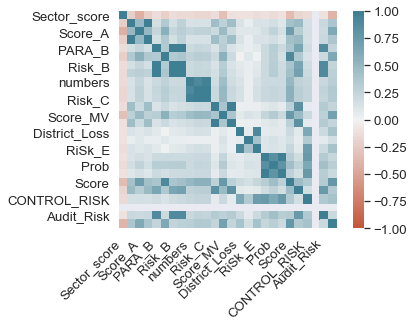

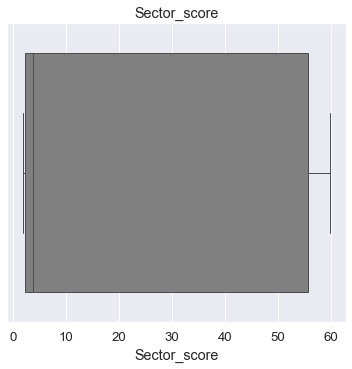

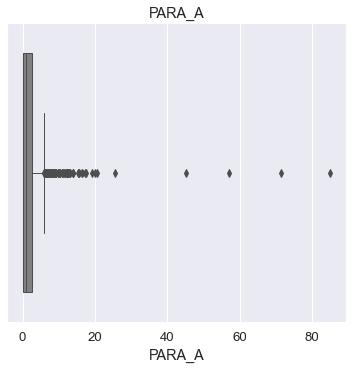

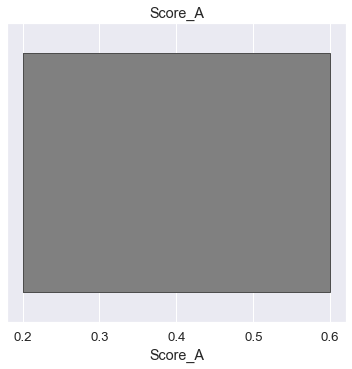

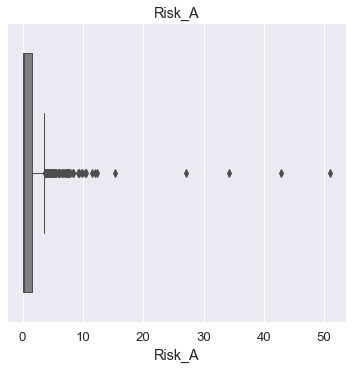

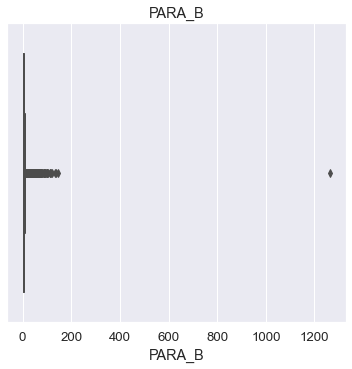

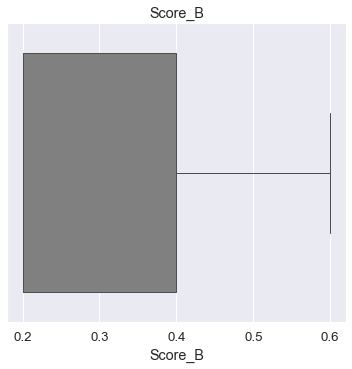

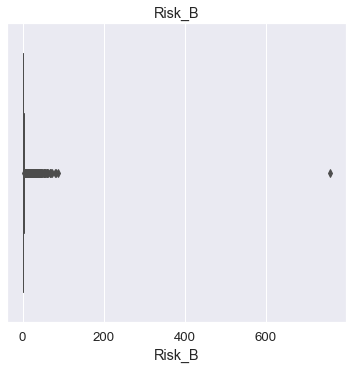

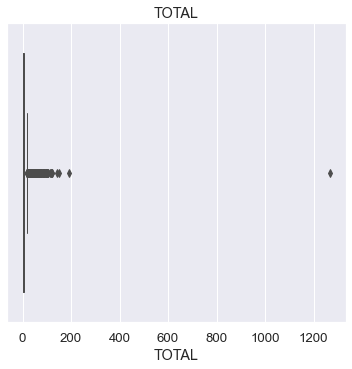

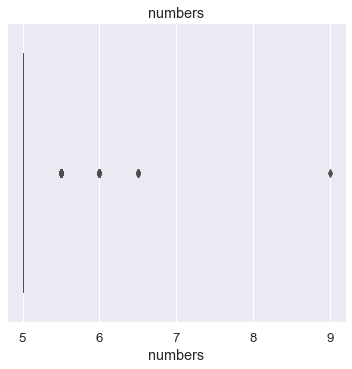

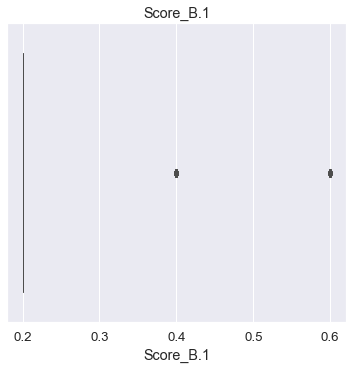

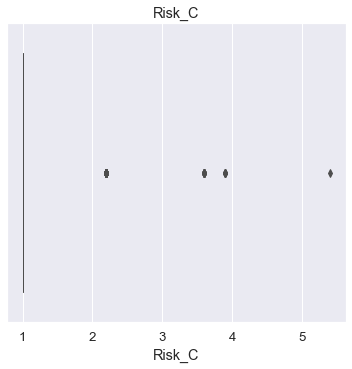

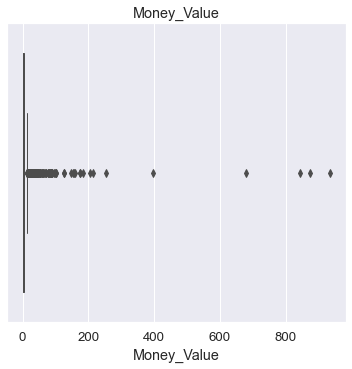

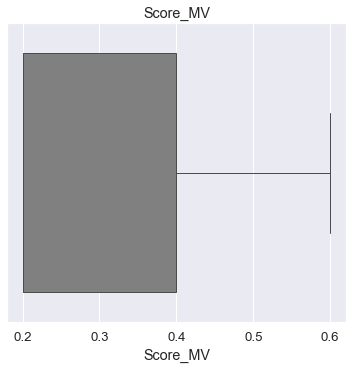

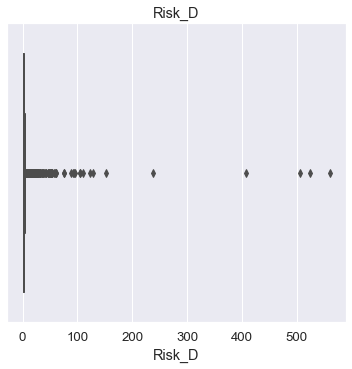

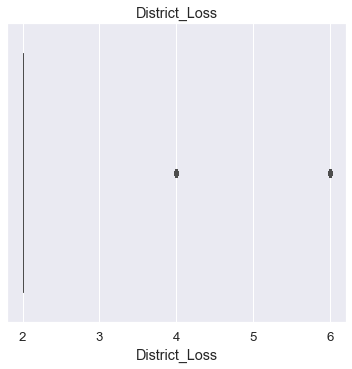

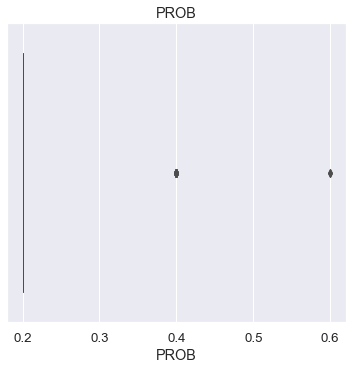

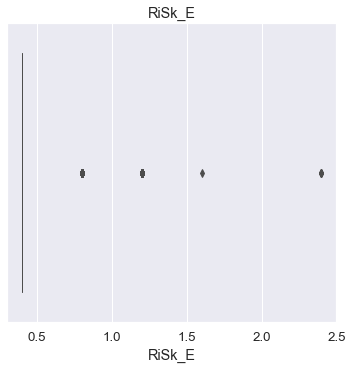

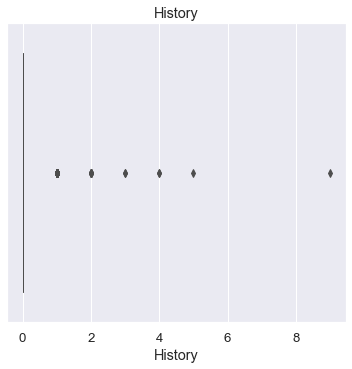

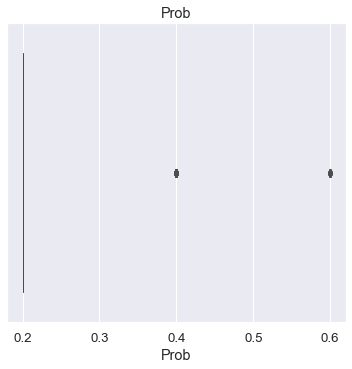

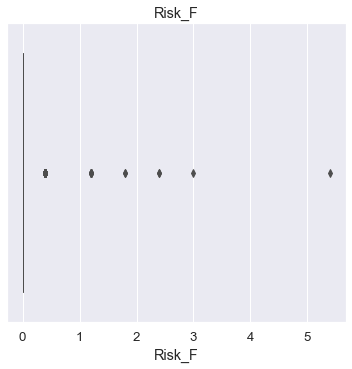

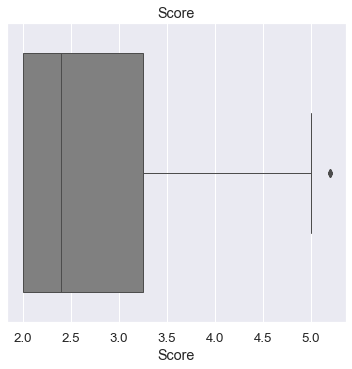

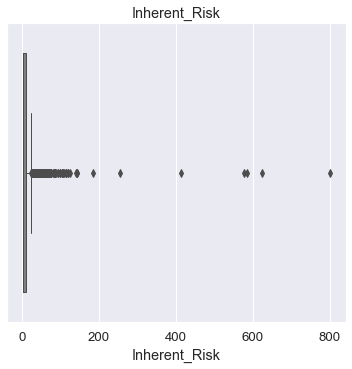

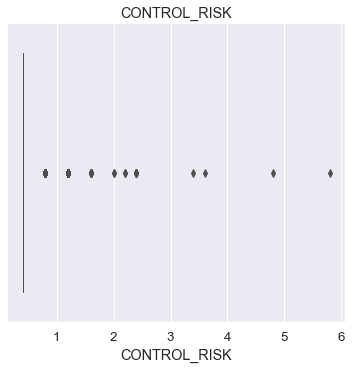

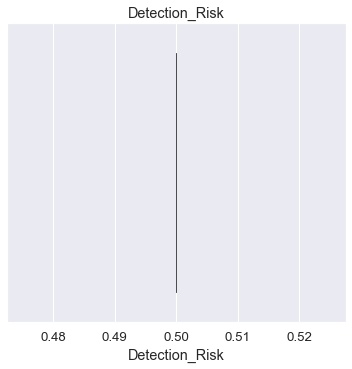

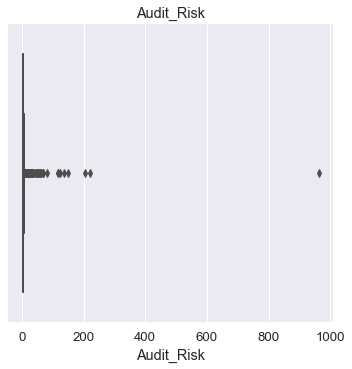

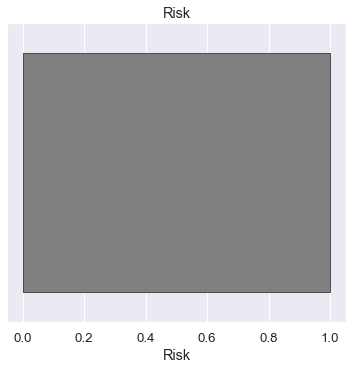

In [44]:
#numerical analysis
#histograms and boxplots for all numerical columns
#scatter plots (seaborn heatmaps)
def numcolanalysis(df):
    #correlation  matrix
    corr = df.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    
    );
    numcols = df.select_dtypes(include=np.number)
    
    for col in numcols:
        fig = plt.figure(figsize = (5,5))
        sb.boxplot(df[col], color='grey', linewidth=1)
        plt.tight_layout()
        plt.title(col)
        plt.savefig("Numerical.png")

        
#print (numcolanalysis(load_data()))

## Manual Split

In [16]:
def XY_split(df):
    #make a copy of the label column and store in y
    y = df['Risk'].copy()
    
    #now delete the original
    X = df.drop('Risk',axis=1)
    return X, y
#print (XY_split(df))

In [17]:
def train_test(df,split,random):
    X,y = XY_split(df)
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    
    return  trainX, testX, trainY, testY 
#checking the split
#print (train_test(df,0.25,2))

## Validation Metrics

In [18]:
def validationmetrics(model,testX,testY):
    predictions = model.predict(testX)
    print("\nPrediction Vector: \n", predictions)
    
    #Accuracy
    print("Accuracy: \n", accuracy_score(testY, predictions)*100)
    
    #Precision
    print("Precision of Fraud Happening: \n", precision_score(testY, predictions,pos_label=1,labels=[0,1])*100)
    
    #Recall
    print("Recall of Fraud Happening: \n", recall_score(testY, predictions,pos_label=1,labels=[0,1])*100)
    
    #get FPR (specificity) and TPR (sensitivity)
    fpr , tpr, _ = roc_curve(testY, predictions)
    
    #AUC
    print("AUC of Fraud Happening: \n",auc(fpr, tpr))
    
    #F-Score
    print("F-Score OF Fraud Happening:\n", f1_score(testY, predictions))
    
    #confusion Matrix
    
    print("Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1]))
    ns_probs = [0 for _ in range(len(testY))]
    ns_auc = roc_auc_score(testY, ns_probs)
    lr_auc = roc_auc_score(testY, predictions)
    ns_fpr, ns_tpr, _ = roc_curve(testY, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testY, predictions)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()

## Random Forest Feature Selection (RFFS)

In [19]:
def RFFS(train_X, test_X, train_y, test_y ):
    clf  = RandomForestClassifier(n_estimators=100, random_state=9)
    print(clf)
    clf.fit(train_X, train_y)
    sfm=SelectFromModel(clf, threshold=0.10)
    sfm.fit(train_X, train_y)
    train_X_imp = sfm.transform(train_X)
    test_X_imp = sfm.transform(test_X)
    return train_X_imp, test_X_imp


## Mutual Information Feature Selection (MIFS)

In [21]:
def MIFS(df):
    X,y=XY_split(df)
    sel_mutual = SelectKBest(mutual_info_classif, k=4)
    train_X_mutual = sel_mutual.fit_transform(X, y)
    
    
    return train_X_mutual
#MIFS(df)

## PCA

In [22]:
def PCAnalysis(df):
    X,y=XY_split(df)
    
    X=StandardScaler().fit_transform(X)
    pca=PCA(n_components=2)
    pca_new=pca.fit_transform(X)
    return pca_new
#PCAnalysis(df)


## Recursive Feature Elimination - RFE

In [23]:
def KNNRE(X, y, trees, random,split):
    clf = RandomForestClassifier(n_estimators=trees, random_state=random)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
    
    #trainX, trainY, testX, testY= cross_valid(X, y,split,repeat,random)
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf = KNeighborsClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [24]:
def NBRFE(X, y, trees, random,split):
    clf = MultinomialNB()
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = MultinomialNB()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [25]:
def LogRegRFE(X, y, random, split):
    clf = LogisticRegression(solver='lbfgs')
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = LogisticRegression(solver='liblinear',penalty='l2')
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [26]:
def MLPRFE(X, y, random, split):
    clf = MLPClassifier(hidden_layer_sizes=(100,100,100))
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = MLPClassifier(hidden_layer_sizes=(100,100,100))
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [27]:
def SVMRFE(X, y, random, split):
    #clf = LogisticRegression(solver='liblinear',penalty='l2')
    clf = SVC(kernel="linear")
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = SVC()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [28]:
def DTRFE(X, y, random, split):
    clf = DecisionTreeClassifier()
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = DecisionTreeClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [29]:
def RFRFE(X, y, trees, random,split):
    clf = RandomForestClassifier(n_estimators=trees, random_state=random)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = RandomForestClassifier(n_estimators=trees, random_state=random)
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [30]:
def XGBoostRFE(X, y, trees, random,split):
    clf = XGBClassifier(n_estimators=trees, random_state=random)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = XGBClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [31]:
def AdaBoostRFE(X, y, trees, random,split):
    clf = AdaBoostClassifier(n_estimators=trees, random_state=random)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = AdaBoostClassifier(n_estimators=trees, random_state=random)
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [32]:
def LGBMRFE(X, y, trees, random,split):
    clf = lgb.LGBMClassifier()
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = lgb.LGBMClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [33]:
def GNBRFE(X, y, random,split):
    clf = GaussianNB()
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    X = X[X.columns[selector.support_].tolist()]
   
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    clf  = GaussianNB()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


# Algorithms 

In [34]:
def KNN(trainX, testX, trainY, testY):
    clf = KNeighborsClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [35]:
def NB(trainX, testX, trainY, testY):
    clf = MultinomialNB()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [36]:
def LogReg( trainX, testX, trainY, testY):
    clf  = LogisticRegression()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [37]:
def MLP( trainX, testX, trainY, testY):
    clf  = MLPClassifier(hidden_layer_sizes=(100,100,100))
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)


In [38]:
def SVM(trainX, testX, trainY, testY):
    clf = SVC()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [39]:
def DecTree(trainX, testX, trainY, testY):
    clf = DecisionTreeClassifier()
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [40]:
def RandomForest(trainX, testX, trainY, testY):
    clf  = RandomForestClassifier(n_estimators=1000, random_state=9)
    clf.fit(trainX,trainY)
    validationmetrics(clf,testX,testY)

In [41]:
def XGBoost(trainX, testX, trainY, testY):
    clf = XGBClassifier(n_estimators=1000, random_state=9)
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [42]:
def AdaBoost(trainX, testX, trainY, testY):
    clf = AdaBoostClassifier(n_estimators=1000, random_state=9)
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [43]:
def LGBM(trainX, testX, trainY, testY):
    clf = lgb.LGBMClassifier() 
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

In [44]:
def GNB(trainX, testX, trainY, testY):
    clf = GaussianNB() 
    clf.fit(trainX , trainY)
    validationmetrics(clf,testX,testY)

# Manual Split

# RFFS results with manual split

RandomForestClassifier(random_state=9)

Results for K-Neraest Neighbour without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 99.35897435897436
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 98.0
AUC of Fraud Happening: 
 0.99
F-Score OF Fraud Happening:
 0.98989898989899
Confusion Matrix: 
 [[106   0]
 [  1  49]]


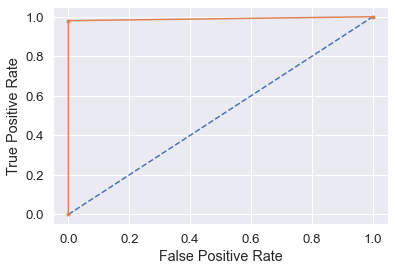

In [45]:
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for K-Neraest Neighbour without cross validation: :\n")
KNN(train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for Naive Bayes without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 89.1025641025641
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 66.0
AUC of Fraud Happening: 
 0.8300000000000001
F-Score OF Fraud Happening:
 0.7951807228915663
Confusion Matrix: 
 [[106   0]
 [ 17  33]]


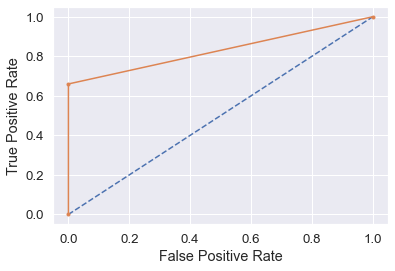

In [47]:
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for Naive Bayes without cross validation: :\n")
NB(train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for logistic Regression without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 99.35897435897436
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 98.0
AUC of Fraud Happening: 
 0.99
F-Score OF Fraud Happening:
 0.98989898989899
Confusion Matrix: 
 [[106   0]
 [  1  49]]


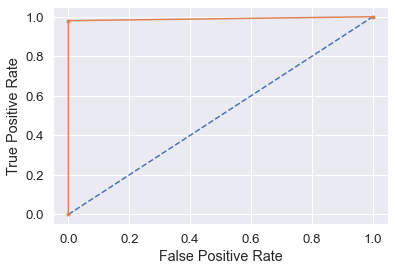

In [48]:
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for logistic Regression without cross validation: :\n")
LogReg (train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for MLP without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 98.71794871794873
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 96.0
AUC of Fraud Happening: 
 0.98
F-Score OF Fraud Happening:
 0.9795918367346939
Confusion Matrix: 
 [[106   0]
 [  2  48]]


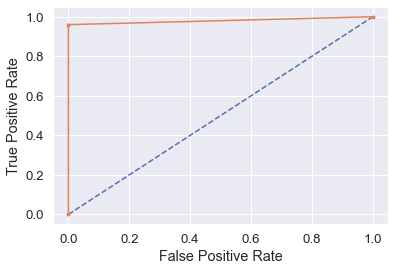

In [49]:
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for MLP without cross validation: :\n")
MLP (train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for SVM without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 89.1025641025641
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 66.0
AUC of Fraud Happening: 
 0.8300000000000001
F-Score OF Fraud Happening:
 0.7951807228915663
Confusion Matrix: 
 [[106   0]
 [ 17  33]]


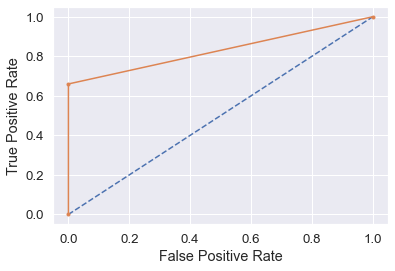

In [50]:
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for SVM without cross validation: :\n")
SVM(train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for Decision Tree without cross validation: :


Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


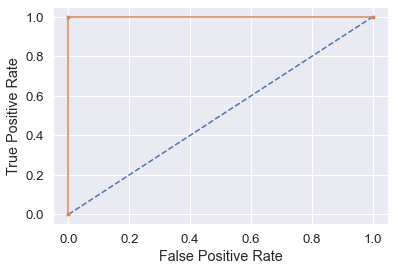

In [51]:
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )

print ("\nResults for Decision Tree without cross validation: :\n")
DecTree(train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for Randon Forest without cross validation: :


Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


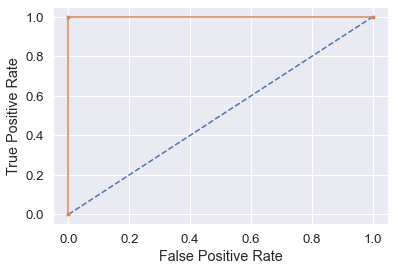

In [52]:
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for Randon Forest without cross validation: :\n")
RandomForest(train_X_imp, test_X_imp, train_y, test_y)


RandomForestClassifier(random_state=9)

Results for XGBoost without cross validation: :



C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  

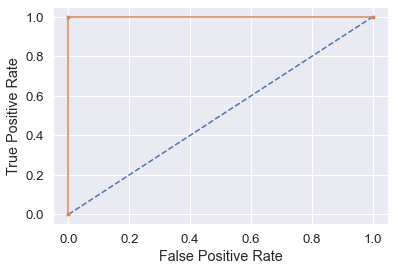

In [53]:
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for XGBoost without cross validation: :\n")
XGBoost (train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for AdaBoost without cross validation: :


Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


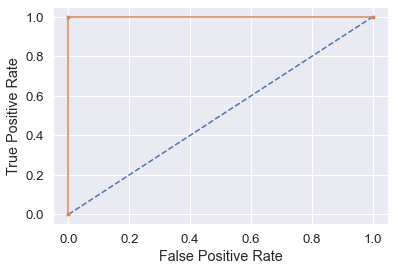

In [54]:
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for AdaBoost without cross validation: :\n")
AdaBoost (train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for LGBM without cross validation: :


Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


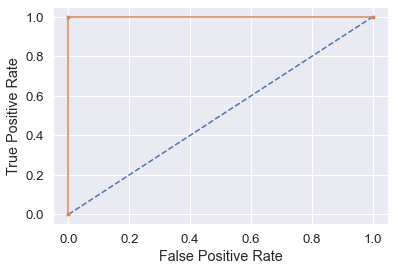

In [55]:
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
print ("\nResults for LGBM without cross validation: :\n")
LGBM(train_X_imp, test_X_imp, train_y, test_y)

RandomForestClassifier(random_state=9)

Results for Gaussian Naive Bayes without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 98.07692307692307
Precision of Fraud Happening: 
 96.07843137254902
Recall of Fraud Happening: 
 98.0
AUC of Fraud Happening: 
 0.980566037735849
F-Score OF Fraud Happening:
 0.9702970297029702
Confusion Matrix: 
 [[104   2]
 [  1  49]]


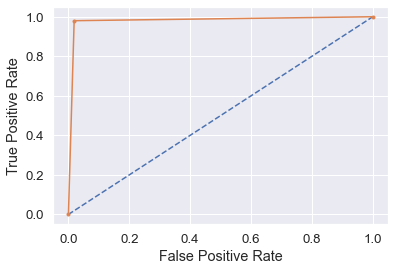

In [56]:
#X,y= XY_split(riskdf)
train_X, test_X, train_y, test_y=train_test(df,0.2,50)
train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
#train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=5)
print ("\nResults for Gaussian Naive Bayes without cross validation: :\n")
GNB(train_X_imp, test_X_imp, train_y, test_y)

# MIFS results with manual split


Results for KNN without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 99.35897435897436
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 98.0
AUC of Fraud Happening: 
 0.99
F-Score OF Fraud Happening:
 0.98989898989899
Confusion Matrix: 
 [[106   0]
 [  1  49]]


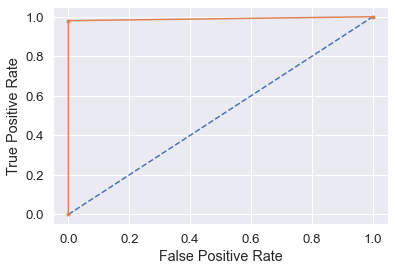

In [57]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for KNN without cross validation: :\n")
KNN(train_X, test_X, train_Y, test_Y)


Results for Naive Bayes without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 91.02564102564102
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 72.0
AUC of Fraud Happening: 
 0.86
F-Score OF Fraud Happening:
 0.8372093023255813
Confusion Matrix: 
 [[106   0]
 [ 14  36]]


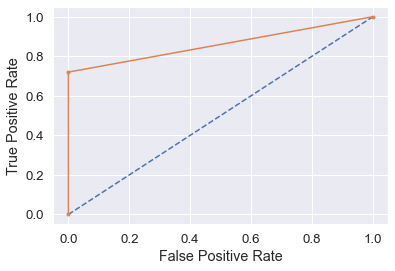

In [60]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for Naive Bayes without cross validation: :\n")
NB(train_X, test_X, train_Y, test_Y)


Results for Logistic Regression without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 99.35897435897436
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 98.0
AUC of Fraud Happening: 
 0.99
F-Score OF Fraud Happening:
 0.98989898989899
Confusion Matrix: 
 [[106   0]
 [  1  49]]


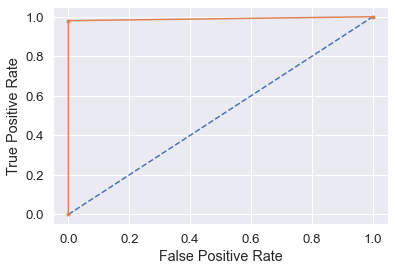

In [61]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2, random_state=50)

print ("\nResults for Logistic Regression without cross validation: :\n")
LogReg(train_X, test_X, train_Y, test_Y)



Results for MLP without cross validation: :


Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


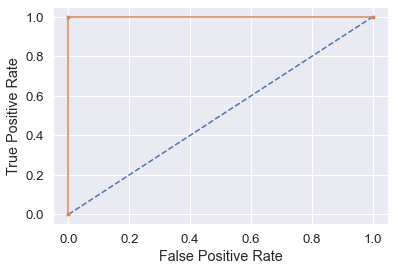

In [62]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2, random_state=50)

print ("\nResults for MLP without cross validation: :\n")
MLP(train_X, test_X, train_Y, test_Y)



Results for SVM without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 91.02564102564102
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 72.0
AUC of Fraud Happening: 
 0.86
F-Score OF Fraud Happening:
 0.8372093023255813
Confusion Matrix: 
 [[106   0]
 [ 14  36]]


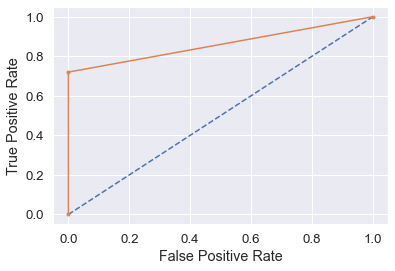

In [63]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for SVM without cross validation: :\n")
SVM(train_X, test_X, train_Y, test_Y)


Results for Decision Tree without cross validation: :


Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


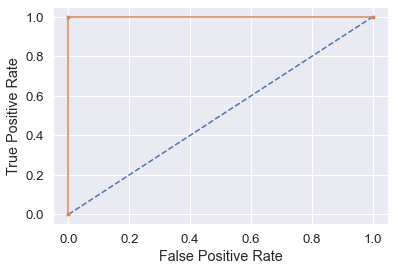

In [64]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for Decision Tree without cross validation: :\n")
DecTree(train_X, test_X, train_Y, test_Y)


Results for Random Forest without cross validation: :


Prediction Vector: 
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[101   0]
 [  0  55]]


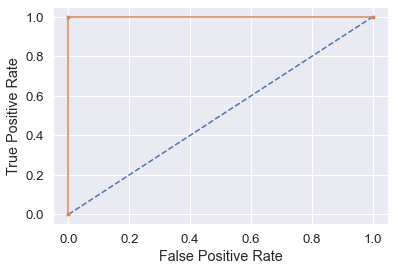

In [65]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=0)

print ("\nResults for Random Forest without cross validation: :\n")
RandomForest(train_X, test_X, train_Y, test_Y)


Results for AdaBoost without cross validation: :

[16:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


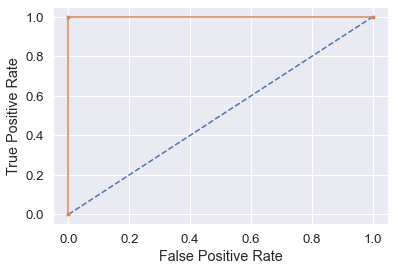

In [66]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for AdaBoost without cross validation: :\n")
XGBoost(train_X, test_X, train_Y, test_Y)


Results for AdaBoost without cross validation: :


Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


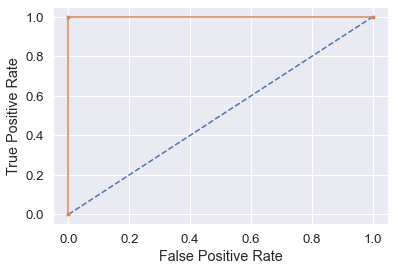

In [67]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for AdaBoost without cross validation: :\n")
AdaBoost(train_X, test_X, train_Y, test_Y)


Results for LGBM without cross validation: :


Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


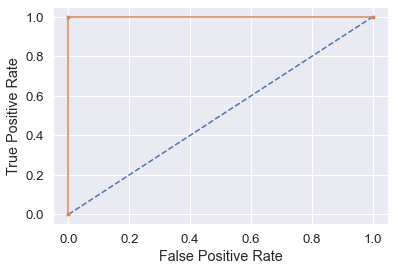

In [68]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for LGBM without cross validation: :\n")
LGBM(train_X, test_X, train_Y, test_Y)


Results for Guasian Naive Bayes without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 95.51282051282051
Precision of Fraud Happening: 
 95.74468085106383
Recall of Fraud Happening: 
 90.0
AUC of Fraud Happening: 
 0.9405660377358491
F-Score OF Fraud Happening:
 0.9278350515463918
Confusion Matrix: 
 [[104   2]
 [  5  45]]


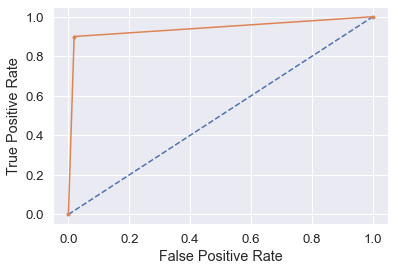

In [69]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
train_X_mutual= MIFS(df)
X,y= XY_split(df)
train_X, test_X, train_Y, test_Y= train_test_split(train_X_mutual,y, test_size=0.2,random_state=50)

print ("\nResults for Guasian Naive Bayes without cross validation: :\n")
GNB(train_X, test_X, train_Y, test_Y)

# Results of PCA with manual split


Results for KNN without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 97.43589743589743
Precision of Fraud Happening: 
 97.91666666666666
Recall of Fraud Happening: 
 94.0
AUC of Fraud Happening: 
 0.9652830188679244
F-Score OF Fraud Happening:
 0.9591836734693877
Confusion Matrix: 
 [[105   1]
 [  3  47]]


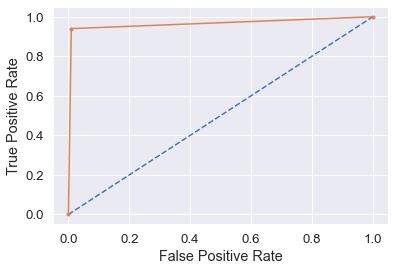

In [70]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
pca_new= PCAnalysis(df)
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for KNN without cross validation: :\n")
KNN(train_X, test_X, train_y, test_y)

###### train_X, train_Y,test_X, test_Y=train_test(meddf,0.2,5)
pca_new= PCAnalysis(meddf)
X,y= XY_split(meddf)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=0)

print ("\nResults for Logistic Regression without cross validation: :\n")
NB(train_X, test_X, train_y, test_y)


Results for Logistic Regression without cross validation: :


Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 96.7948717948718
Precision of Fraud Happening: 
 95.91836734693877
Recall of Fraud Happening: 
 94.0
AUC of Fraud Happening: 
 0.960566037735849
F-Score OF Fraud Happening:
 0.9494949494949495
Confusion Matrix: 
 [[104   2]
 [  3  47]]


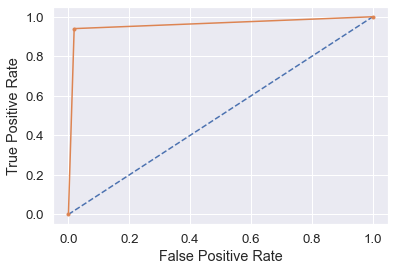

In [71]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
pca_new= PCAnalysis(df)
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for Logistic Regression without cross validation: :\n")
LogReg(train_X, test_X, train_y, test_y)


Results for MLP without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 96.7948717948718
Precision of Fraud Happening: 
 94.11764705882352
Recall of Fraud Happening: 
 96.0
AUC of Fraud Happening: 
 0.9658490566037736
F-Score OF Fraud Happening:
 0.9504950495049505
Confusion Matrix: 
 [[103   3]
 [  2  48]]


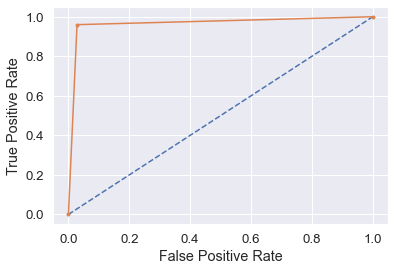

In [72]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
pca_new= PCAnalysis(df)
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for MLP without cross validation: :\n")
MLP(train_X, test_X, train_y, test_y)


Results for SVM without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 96.7948717948718
Precision of Fraud Happening: 
 97.87234042553192
Recall of Fraud Happening: 
 92.0
AUC of Fraud Happening: 
 0.9552830188679245
F-Score OF Fraud Happening:
 0.9484536082474226
Confusion Matrix: 
 [[105   1]
 [  4  46]]


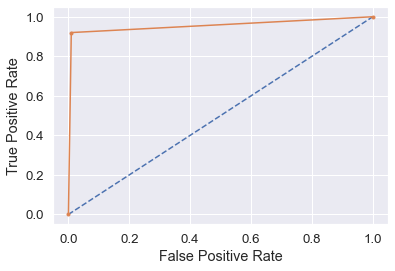

In [75]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
pca_new= PCAnalysis(df)
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for SVM without cross validation: :\n")
SVM(train_X, test_X, train_y, test_y)


Results for Decision Tree without cross validation: :


Prediction Vector: 
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 96.7948717948718
Precision of Fraud Happening: 
 94.11764705882352
Recall of Fraud Happening: 
 96.0
AUC of Fraud Happening: 
 0.9658490566037736
F-Score OF Fraud Happening:
 0.9504950495049505
Confusion Matrix: 
 [[103   3]
 [  2  48]]


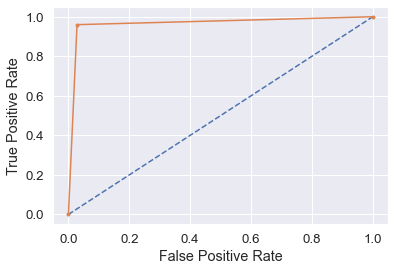

In [76]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
pca_new= PCAnalysis(df)
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for Decision Tree without cross validation: :\n")
DecTree(train_X, test_X, train_y, test_y)


Results for Random Forest without cross validation: :


Prediction Vector: 
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 97.43589743589743
Precision of Fraud Happening: 
 96.0
Recall of Fraud Happening: 
 96.0
AUC of Fraud Happening: 
 0.970566037735849
F-Score OF Fraud Happening:
 0.96
Confusion Matrix: 
 [[104   2]
 [  2  48]]


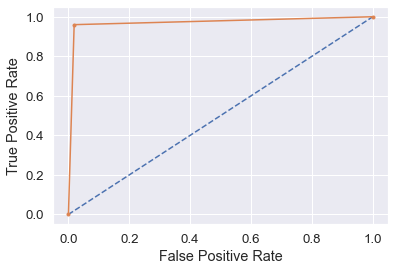

In [77]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
pca_new= PCAnalysis(df)
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for Random Forest without cross validation: :\n")
RandomForest(train_X, test_X, train_y, test_y)


Results for XGBoost without cross validation: :

[16:16:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Prediction Vector: 
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 97.43589743589743
Precision of Fraud Happening: 
 96.0
Recall of Fraud Happening: 
 96.0
AUC of Fraud Happening: 
 0.970566037735849
F-Score OF Fraud Happening:
 0.96
Confusion Matrix: 
 [[104   2]
 [  2  48]]


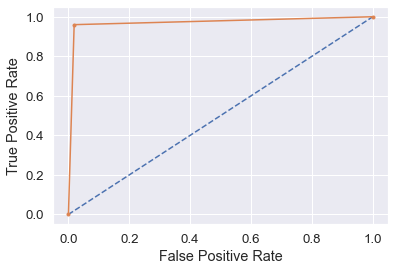

In [78]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
pca_new= PCAnalysis(df)
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for XGBoost without cross validation: :\n")
XGBoost(train_X, test_X, train_y, test_y)


Results for AdaBoost without cross validation: :


Prediction Vector: 
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 94.23076923076923
Precision of Fraud Happening: 
 90.19607843137256
Recall of Fraud Happening: 
 92.0
AUC of Fraud Happening: 
 0.9364150943396227
F-Score OF Fraud Happening:
 0.9108910891089109
Confusion Matrix: 
 [[101   5]
 [  4  46]]


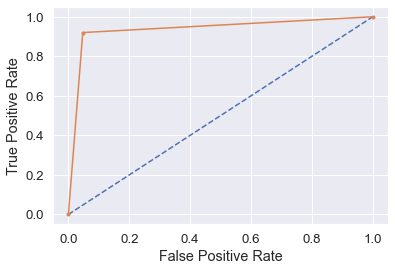

In [79]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
pca_new= PCAnalysis(df)
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for AdaBoost without cross validation: :\n")
AdaBoost(train_X, test_X, train_y, test_y)


Results for LGBM without cross validation: :


Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 96.7948717948718
Precision of Fraud Happening: 
 95.91836734693877
Recall of Fraud Happening: 
 94.0
AUC of Fraud Happening: 
 0.960566037735849
F-Score OF Fraud Happening:
 0.9494949494949495
Confusion Matrix: 
 [[104   2]
 [  3  47]]


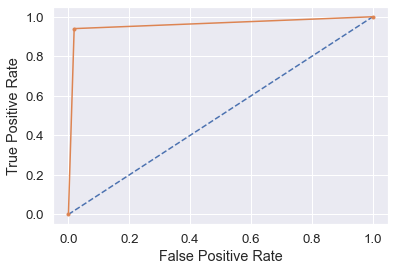

In [80]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
pca_new= PCAnalysis(df)
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for LGBM without cross validation: :\n")
LGBM(train_X, test_X, train_y, test_y)


Results for GNB without cross validation: :


Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 94.87179487179486
Precision of Fraud Happening: 
 88.88888888888889
Recall of Fraud Happening: 
 96.0
AUC of Fraud Happening: 
 0.9516981132075472
F-Score OF Fraud Happening:
 0.923076923076923
Confusion Matrix: 
 [[100   6]
 [  2  48]]


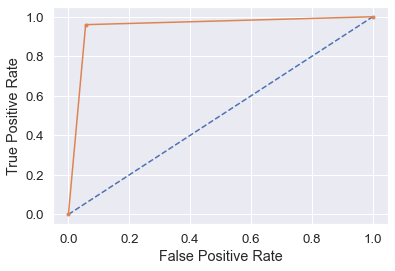

In [81]:
train_X, train_Y,test_X, test_Y=train_test(df,0.2,5)
pca_new= PCAnalysis(df)
X,y= XY_split(df)
train_X, test_X, train_y, test_y= train_test_split(pca_new, y, test_size=0.2, random_state=50)

print ("\nResults for GNB without cross validation: :\n")
GNB(train_X, test_X, train_y, test_y)

## RFE Results with Manual split

NB

Prediction Vector: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy: 
 73.71794871794873
Precision of Fraud Happening: 
 90.9090909090909
Recall of Fraud Happening: 
 20.0
AUC of Fraud Happening: 
 0.5952830188679246
F-Score OF Fraud Happening:
 0.32786885245901637
Confusion Matrix: 
 [[105   1]
 [ 40  10]]


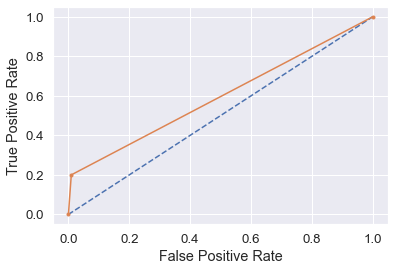

In [82]:
X, y = XY_split(df)
print("NB")
NBRFE(X,y,100, 50,0.2)

SVM

Prediction Vector: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 90.38461538461539
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 70.0
AUC of Fraud Happening: 
 0.85
F-Score OF Fraud Happening:
 0.8235294117647058
Confusion Matrix: 
 [[106   0]
 [ 15  35]]


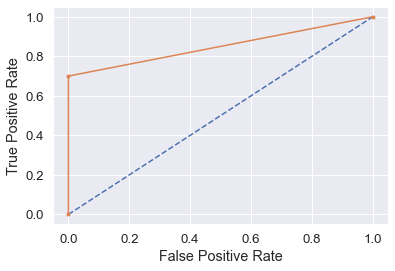

In [84]:
X, y = XY_split(df)
print("SVM")
SVMRFE(X,y,50,0.2)

DT

Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


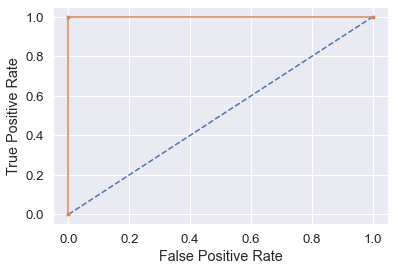

In [85]:
X, y = XY_split(df)
print("DT")
DTRFE(X,y, 50,0.2)

Random Forest

Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


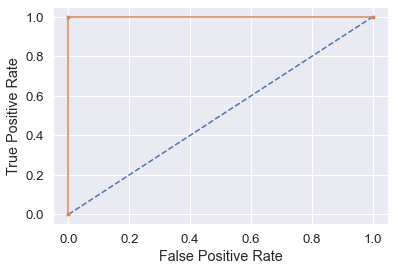

In [86]:
X, y = XY_split(df)
print("Random Forest")
RFRFE(X,y,100, 50,0.2)

XGboost
[16:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[16:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\iuser\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[16:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

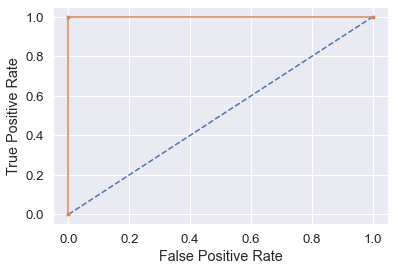

In [87]:
X, y = XY_split(df)
print("XGboost")
XGBoostRFE(X,y,100, 50,0.2)

Adaboost

Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


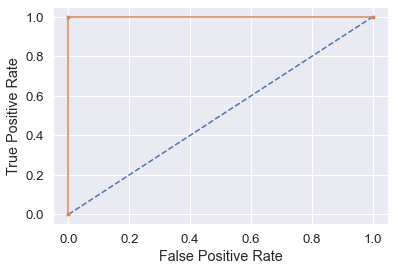

In [88]:
X, y = XY_split(df)
print("Adaboost")
AdaBoostRFE(X,y,100, 50,0.2)

LGBM

Prediction Vector: 
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Accuracy: 
 100.0
Precision of Fraud Happening: 
 100.0
Recall of Fraud Happening: 
 100.0
AUC of Fraud Happening: 
 1.0
F-Score OF Fraud Happening:
 1.0
Confusion Matrix: 
 [[106   0]
 [  0  50]]


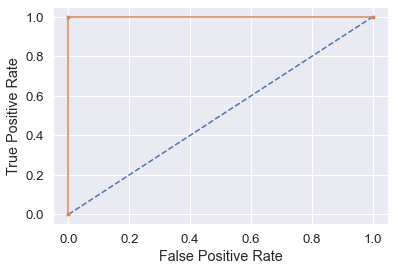

In [89]:
X, y = XY_split(df)
print("LGBM")
LGBMRFE(X,y, 100,50,0.2)

# PARAMETER TUNING

## Selected AdaBoost for Parameter Tuning

In [90]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [91]:
def RandomForest_ParameterTuning(trainX, testX, trainY, testY):
    clf  = RandomForestClassifier()
    r = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,
                                   n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    r.fit(trainX,trainY)
    validationmetrics(r,testX,testY)
    #base_accuracy = evaluate(r,testX,testY)
    pprint (r.best_params_)
    

RandomForestClassifier(random_state=9)

Results for Randon Forest without cross validation: :

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.1s finished



Prediction Vector: 
 [1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
Accuracy: 
 98.71794871794873
Precision of Fraud Happening: 
 98.33333333333333
Recall of Fraud Happening: 
 98.33333333333333
AUC of Fraud Happening: 
 0.9864583333333333
F-Score OF Fraud Happening:
 0.9833333333333333
Confusion Matrix: 
 [[95  1]
 [ 1 59]]


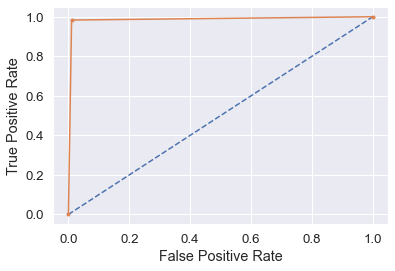

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}


In [92]:
def initial_result(df):
    X,y= XY_split(df)
    train_X, test_X, train_y, test_y= train_test_split(X, y, test_size=0.2, random_state=34)
    train_X_imp,test_X_imp= RFFS(train_X, test_X, train_y, test_y )
    print ("\nResults for Randon Forest without cross validation: :\n")
    RandomForest_ParameterTuning(train_X_imp, test_X_imp, train_y, test_y)
    
    
initial_result(df)    

# Conclusion
#### SVM and NB didn't perform well and Dec tree , Random Forest, XGBoost and AdaBoost gave 100% Accuracies

## Hyperparameter on RandonForest decreased the accuracy